In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
cd /content/drive/MyDrive/official/Creations/role-change/SCE-Interview-12June-2025/code_notebooks/ud120-projects-master/outliers

/content/drive/MyDrive/official/Creations/role-change/SCE-Interview-12June-2025/code_notebooks/ud120-projects-master/outliers


In [ ]:
#!/usr/bin/python3

import random
import numpy
import matplotlib.pyplot as plt
import joblib

from outlier_cleaner import outlierCleaner

In [60]:
### load up some practice data with outliers in it
ages = joblib.load( open("./practice_outliers_ages.pkl", "rb") )
net_worths = joblib.load( open("./practice_outliers_net_worths.pkl", "rb") )
### ages and net_worths need to be reshaped into 2D numpy arrays
### second argument of reshape command is a tuple of integers: (n_rows, n_columns)
### by convention, n_rows is the number of data points
### and n_columns is the number of features
ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))
from sklearn.model_selection import train_test_split
ages_train, ages_test, net_worths_train, net_worths_test = train_test_split(ages, net_worths, test_size=0.1, random_state=42)


In [61]:
### fill in a regression here!  Name the regression object reg so that
### the plotting code below works, and you can see what your regression looks like
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(ages_train, net_worths_train)

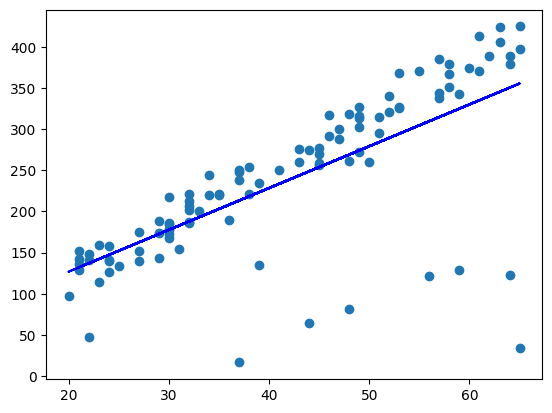

In [62]:
try:
    plt.plot(ages, reg.predict(ages), color="blue")
except NameError:
    pass
plt.scatter(ages, net_worths)
plt.show()

In [63]:
## slope of the regression
slope = reg.coef_
slope

array([[5.07793064]])

In [64]:
score = reg.score(ages_test, net_worths_test)
score

0.8782624703664672

In [65]:
def outlierCleaner(predictions, ages, net_worths):
    """
        Clean away the 10% of points that have the largest
        residual errors (difference between the prediction
        and the actual net worth).

        Return a list of tuples named cleaned_data where
        each tuple is of the form (age, net_worth, error).
    """

    cleaned_data = []

    ### your code goes here
    for pred, nw, age in zip(predictions, net_worths, ages):
      error = pred-nw
      cleaned_data.append((age, nw, error))

    print(cleaned_data)
    cleaned_data.sort(key=lambda x:(x[2], x[1]))
    #data.sort(key=lambda x: (x[2], x[1]))
    data_length = len(cleaned_data)
    elements_to_discard = int(data_length*0.90)
    cleaned_data = cleaned_data[:elements_to_discard]

    return cleaned_data

In [66]:
### identify and remove the most outlier-y points
#from outlier_cleaner import outlierCleaner
cleaned_data = []
try:
    predictions = reg.predict(ages_train)
    cleaned_data = outlierCleaner( predictions, ages_train, net_worths_train )
except NameError:
    print("Your regression object doesn't exist, or isn't name reg")
    print("Can't make predictions to use in identifying outliers")

[(array([57]), array([338.08951849]), array([-23.43745027])), (array([57]), array([344.21586776]), array([-29.56379953])), (array([34]), array([243.79287312]), array([-45.93320969])), (array([64]), array([378.84578142]), array([-28.6481987])), (array([25]), array([133.88384977]), array([18.27443786])), (array([53]), array([326.56693251]), array([-32.22658686])), (array([62]), array([389.24094136]), array([-49.19921993])), (array([41]), array([250.26985299]), array([-16.86467506])), (array([21]), array([136.08924543]), array([-4.24268037])), (array([53]), array([368.29556369]), array([-73.95521804])), (array([48]), array([318.62560238]), array([-49.67490995])), (array([24]), array([139.40479592]), array([7.67556106])), (array([24]), array([126.98012845]), array([20.10022854])), (array([30]), array([185.18703435]), array([-7.6390935])), (array([32]), array([187.09760491]), array([0.60619723])), (array([45]), array([270.00424942]), array([-16.28734891])), (array([52]), array([339.7693316]

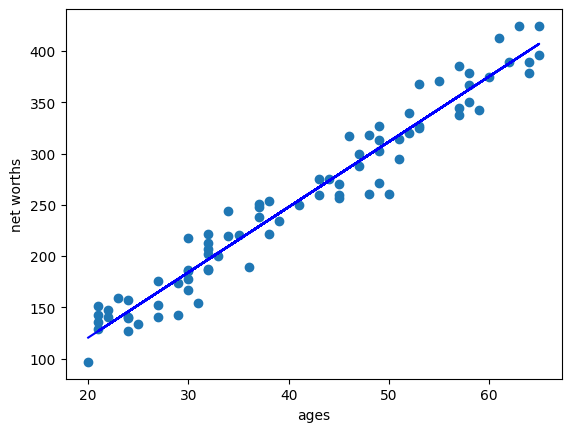

In [67]:
### only run this code if cleaned_data is returning data
if len(cleaned_data) > 0:
    ages, net_worths, errors = zip(*cleaned_data)
    ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
    net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))

    ### refit your cleaned data!
    try:
        reg.fit(ages, net_worths)
        plt.plot(ages, reg.predict(ages), color="blue")
    except NameError:
        print("You don't seem to have regression imported/created,")
        print("   or else your regression object isn't named reg")
        print("   either way, only draw the scatter plot of the cleaned data")
    plt.scatter(ages, net_worths)
    plt.xlabel("ages")
    plt.ylabel("net worths")
    plt.show()


else:
    print("outlierCleaner() is returning an empty list, no refitting to be done")

In [68]:
## slope of the regression
slope = reg.coef_
slope

array([[6.36859481]])

In [69]:
score = reg.score(ages_test, net_worths_test)
score

0.983189455395532